# Simple Linear Regression For Salary Data

In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import statsmodels.formula.api as smf  

In [3]:
data = pd.read_csv("Salary_Data.csv")

In [4]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.isnull()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


Text(0, 0.5, 'Salary')

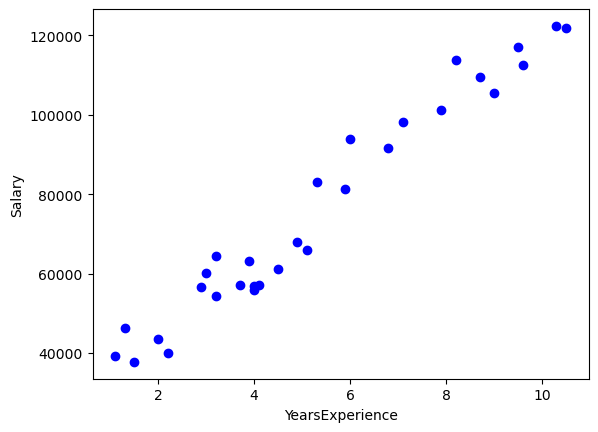

In [6]:
import matplotlib.pyplot as plt
plt.plot(data.YearsExperience,data.Salary, "bo") 
plt.xlabel("YearsExperience")
plt.ylabel("Salary") 

# Correlation

In [7]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [8]:
data.describe() 

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

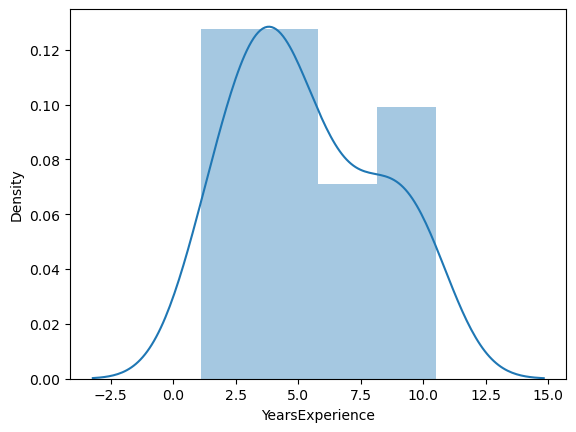

In [10]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.distplot(data['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

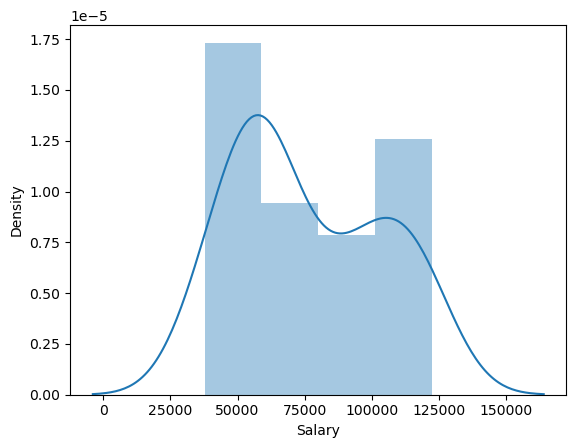

In [11]:
import seaborn as sns
sns.distplot(data['Salary']) 

# Fitting a Linear Regression Model

In [12]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = data).fit()  

In [13]:
model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        19:54:14   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

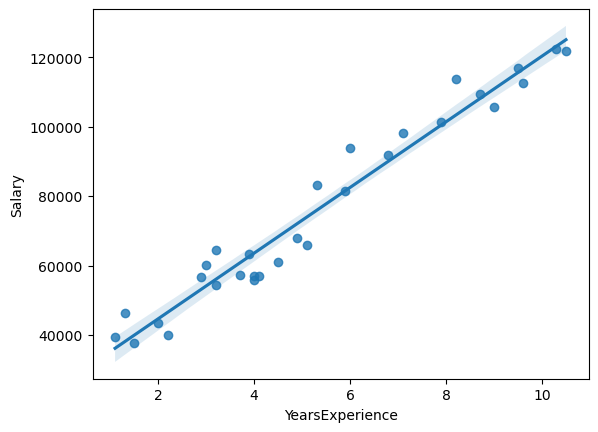

In [14]:
sns.regplot(x="YearsExperience", y="Salary", data=data);

In [15]:
#Coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [16]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)     

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [17]:
#R squared values
(model.rsquared,model.rsquared_adj) 

(0.9569566641435086, 0.9554194021486339)

# Model Predictions

In [18]:
# Manual prediction for 3 yrs of experience  
  
Salary =(25792.200199)+(9449.962321)*3
Salary

54142.087162

In [19]:
# Automatic prediction for 3 & 5 yrs of experience

new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [20]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [25]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64